Noktalar yani target sınıfında bulunan değerlerin diğer target değerlerine göre uzaklıkları hesaplanır. k komşu sayısı kadar kendisine yakın bulunan target değerlerini alır. kangi değer fazla ise o değeri tahmin olarak verir. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()
# 1 ler şeker hastası 0 lar sağlıklı.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
for i in df.select_dtypes([float, int]).columns:
    if i == "DiabetesPedigreeFunction" and i == "Insulin" :
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(2.5*IQR)
        ust_sinir = Q3+(2.5*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir
        
        
    elif  i == "BloodPressure" and i == "BMI" and i == "Age" :
            Q1 = df[i].quantile(0.25)
            Q3 = df[i].quantile(0.75)
            IQR = Q3-Q1
            alt_sinir = Q1-(1.8*IQR)
            ust_sinir = Q3+(1.8*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
            aykiri_alt = df[i] < alt_sinir
            aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
            df[i][aykiri_alt] = alt_sinir
            df[i][aykiri_ust] = ust_sinir
    
    else : 
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(1.6*IQR)
        ust_sinir = Q3+(1.6*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir

In [4]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier())]
knn_model = Pipeline(operations)
knn_model.fit(X_train, y_train)

eval_metric(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[82 18]
 [25 29]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       100
           1       0.62      0.54      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.72      0.72       154


Train_Set
[[365  35]
 [ 76 138]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       400
           1       0.80      0.64      0.71       214

    accuracy                           0.82       614
   macro avg       0.81      0.78      0.79       614
weighted avg       0.82      0.82      0.81       614



In [8]:
from sklearn.model_selection import cross_validate

operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier())]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.652
test_recall      0.510
test_f1          0.569
test_accuracy    0.735
dtype: float64

In [9]:
k_range = range(1,50)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
list_dist = []
list_score = []
sayac = 1
for k in k_range : 
    model = KNeighborsClassifier(n_neighbors= k)
    model.fit(X_train_scaled, y_train)
    #print(sayac , "Doğruluk oranı = % ", model.score(X_train_scaled, y_train)*100)
    sayac = sayac + 1
    list_dist.append(sayac-1)
    list_score.append(round(model.score(X_train_scaled, y_train)*100,2))
list_score = pd.DataFrame(list_score)  
list_dist = pd.DataFrame(list_dist)
train_k = pd.concat([list_dist, list_score], axis=1)
train_k.columns = ["k_value_train", "score_train"]
train_k

list_dist1 = []
list_score1 = []
index = 1
for k in k_range : 
    model2 = KNeighborsClassifier(n_neighbors= k)
    model2.fit(X_train_scaled, y_train)
    #print(sayac , "Doğruluk oranı = % ", model.score(X_train_scaled, y_train)*100)
    index = index + 1
    list_dist1.append(index-1)
    list_score1.append(round(model2.score(X_test_scaled, y_test)*100,2))
list_score1 = pd.DataFrame(list_score1)  
list_dist1 = pd.DataFrame(list_dist1)
test_k = pd.concat([list_dist1, list_score1], axis=1)
test_k.columns = ["k_value_test", "score_test"]
scores = pd.concat([test_k, train_k], axis=1)
scores["result"] = scores["score_train"] - scores["score_test"]

In [10]:
scores["result"].min()

1.539999999999992

In [11]:
scores[scores["result"] == scores["result"].min()]

,k_value_test,score_test,k_value_train,score_train,result
33,34,74.680,34,76.220,1.540


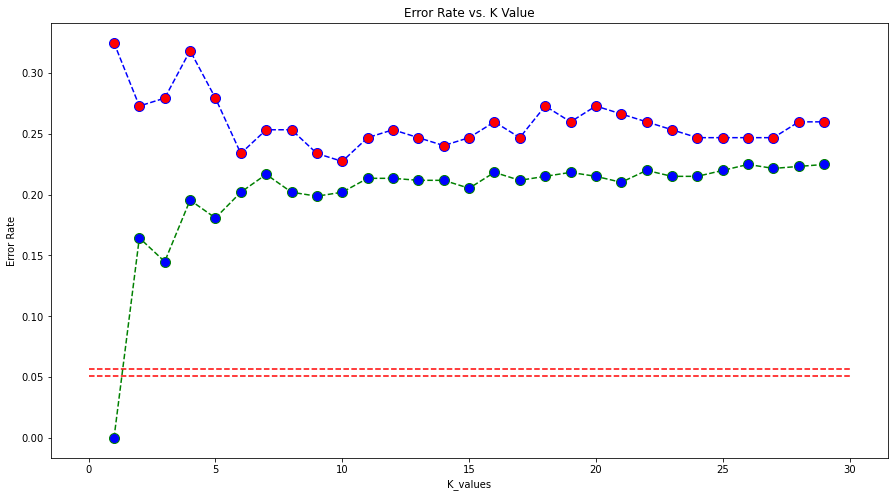

In [12]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)
    
    
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.051, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [13]:
from sklearn.model_selection import GridSearchCV

In [15]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
Pipeline(steps=operations)
pipe_model = Pipeline(steps=operations)

k_values = range(1,50)

from sklearn.metrics import make_scorer
recall_1 = make_scorer(recall_score, pos_label = 1)

param_grid = {"knn__n_neighbors":k_values, "knn__p": [1,2], "knn__weights": ['uniform', "distance"]}
pipe_model = Pipeline(steps=operations)
grid_model = GridSearchCV(pipe_model, param_grid, cv=10, scoring= recall_1)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 50), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, pos_label=1))

In [16]:
grid_model.best_params_

{'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'uniform'}

In [17]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[77 23]
 [27 27]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       100
           1       0.54      0.50      0.52        54

    accuracy                           0.68       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.68      0.67       154


Train_Set
[[400   0]
 [  0 214]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [21]:
grid_model.best_params_

{'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'uniform'}